
## Driver drowsiness detection is a car safety technology which helps prevent accidents caused by the driver getting drowsy. Various studies have suggested that around 20% of all road accidents are fatigue-related, up to 50% on certain roads.

# importing required libraries:

In [8]:
# importing required libraries:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

# setting the path to our eye dataset: 

In [5]:
# setting the path to our eye dataset: 
Directory = r'D:\Downloads\driver-drowsiness-detection-Project\dataset'
# specify two categories on which we want to train our data:
CATEGORIES = ['Closed' , 'Open']

In [6]:
#setting image size:
img_size = 24
data = []

#iterating over each image and get the image in array form,
for category in CATEGORIES:
    folder = os.path.join(Directory,category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr = cv2.resize(img_arr,(img_size, img_size),1)
        data.append([img_arr , label])

In [7]:
# see the length of data:
len(data)

1452

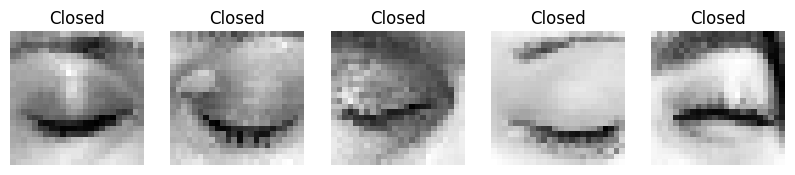

In [8]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(data[i][0], cmap='gray')
    plt.title("Closed" if data[i][1] == 0 else "Open")
    plt.axis('off')
plt.show()

In [9]:
# we shuffle the data to get random images of open eyes and closed eyes:
random.shuffle(data)

# dividing features and label for training the model

In [10]:
# dividing features and label for training the model: 
X = []
Y = []

for features,label in data:
    X.append(features)
    Y.append(label)

# covert them into array

In [11]:
#covert them into array:
X = np.array(X)
Y = np.array(Y)

In [12]:
# save the data into system:
pickle.dump(X , open('X.pkl' , 'wb'))
pickle.dump(Y , open('Y.pkl' , 'wb'))

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.model_selection import train_test_split


# Divide the data into training set and test set

In [14]:
# ## 7. Divide the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


# normalize the image array

In [15]:
# normalize the image array:
X = X/255

In [16]:
X

array([[[0.56078431, 0.52941176, 0.51764706, ..., 0.52156863,
         0.56470588, 0.47843137],
        [0.55294118, 0.55686275, 0.52156863, ..., 0.60392157,
         0.63137255, 0.64313725],
        [0.48235294, 0.49019608, 0.56470588, ..., 0.44313725,
         0.57254902, 0.51764706],
        ...,
        [0.51764706, 0.52941176, 0.58431373, ..., 0.63529412,
         0.6745098 , 0.72941176],
        [0.5372549 , 0.53333333, 0.52941176, ..., 0.69803922,
         0.71764706, 0.74901961],
        [0.57254902, 0.57254902, 0.58039216, ..., 0.72941176,
         0.75686275, 0.75294118]],

       [[0.01960784, 0.01960784, 0.02352941, ..., 0.0745098 ,
         0.0745098 , 0.0745098 ],
        [0.01568627, 0.03137255, 0.04313725, ..., 0.07843137,
         0.09411765, 0.10588235],
        [0.03921569, 0.0627451 , 0.05882353, ..., 0.10196078,
         0.10196078, 0.10196078],
        ...,
        [0.09411765, 0.12156863, 0.09803922, ..., 0.05882353,
         0.05882353, 0.06666667],
        [0.0

In [17]:
# reshape the X array to (24,24,1)
img_rows,img_cols = 24,24
X = X.reshape(X.shape[0],img_rows,img_cols,1)
X.shape

(1452, 24, 24, 1)

# Model

In [18]:
# we will be using keras to create the model:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense

In [19]:
# creating model:
model = Sequential()

model.add(Conv2D(64 , (3,3) , activation = 'relu' , input_shape= X.shape[1:]))
model.add(MaxPooling2D((1,1)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((1,1)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((1,1)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [20]:
# compile model that we have created
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [21]:
# fit X , Y to the model to see accuracy of model:
history = model.fit(X, Y, epochs = 10 , validation_split = 0.1 , batch_size = 32)

Epoch 1/10
41/41 [==============================] - 5s 97ms/step - loss: 0.4134 - accuracy: 0.8338 - val_loss: 0.2607 - val_accuracy: 0.8836
Epoch 2/10
41/41 [==============================] - 4s 89ms/step - loss: 0.1820 - accuracy: 0.9319 - val_loss: 0.1016 - val_accuracy: 0.9589
Epoch 3/10
41/41 [==============================] - 3s 83ms/step - loss: 0.1231 - accuracy: 0.9533 - val_loss: 0.0879 - val_accuracy: 0.9658
Epoch 4/10
41/41 [==============================] - 4s 86ms/step - loss: 0.0832 - accuracy: 0.9671 - val_loss: 0.0832 - val_accuracy: 0.9726
Epoch 5/10
41/41 [==============================] - 4s 104ms/step - loss: 0.0851 - accuracy: 0.9717 - val_loss: 0.0576 - val_accuracy: 0.9726
Epoch 6/10
41/41 [==============================] - 4s 100ms/step - loss: 0.0676 - accuracy: 0.9732 - val_loss: 0.0610 - val_accuracy: 0.9726
Epoch 7/10
41/41 [==============================] - 5s 110ms/step - loss: 0.0359 - accuracy: 0.9832 - val_loss: 0.0806 - val_accuracy: 0.9795
Epoch 8/10

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

PLOT OF MODEL

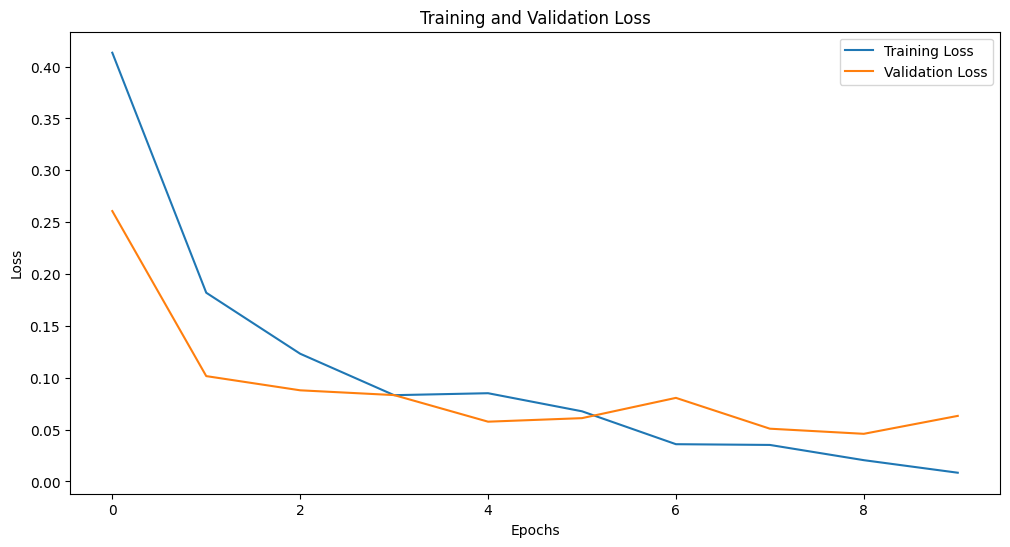

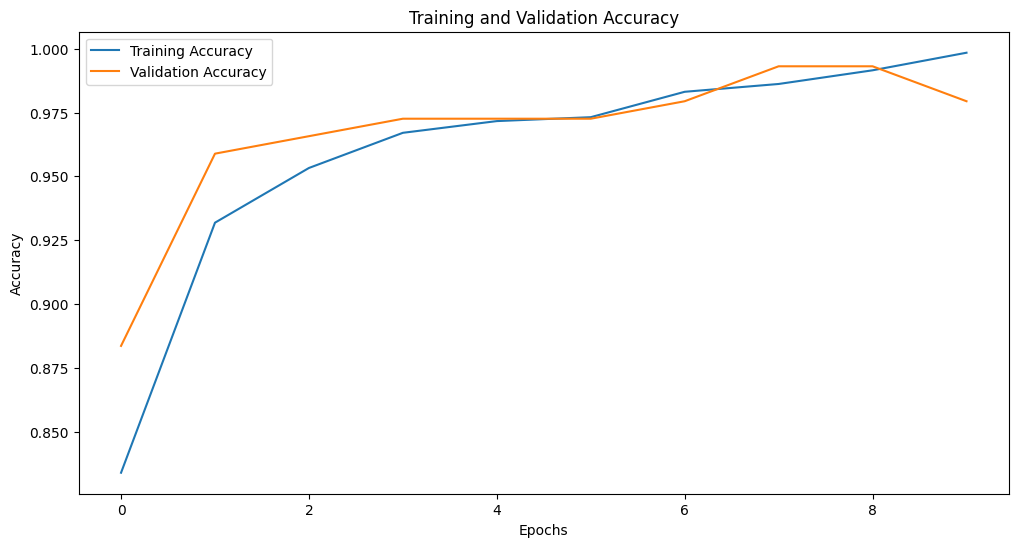

In [23]:
import matplotlib.pyplot as plt

# plot of loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot of Accuracy
if 'accuracy' in history.history:
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()


In [24]:
# Predict on the test set
Y_pred = np.argmax(model.predict(X_test), axis=1)



5/5 [==============================] - 0s 18ms/step


In [25]:
from sklearn.metrics import accuracy_score

# predict 
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# calculate the accuracy on test set:
accuracy = accuracy_score(Y_test, Y_pred_classes)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

5/5 [==============================] - 0s 16ms/step
Accuracy on test set: 98.63%


In [26]:
from sklearn.metrics import classification_report

# categories 
labels = range(len(CATEGORIES))  

report = classification_report(Y_test, Y_pred_classes, target_names=CATEGORIES, labels=labels)
print("Classification report:\n", report)


Classification report:
               precision    recall  f1-score   support

      Closed       1.00      0.97      0.98        67
        Open       0.98      1.00      0.99        79

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146



In [27]:
# save model and architecture to single file
model.save("custmodel.h5")

c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


              precision    recall  f1-score   support

      Closed       1.00      0.97      0.98        67
        Open       0.98      1.00      0.99        79

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146



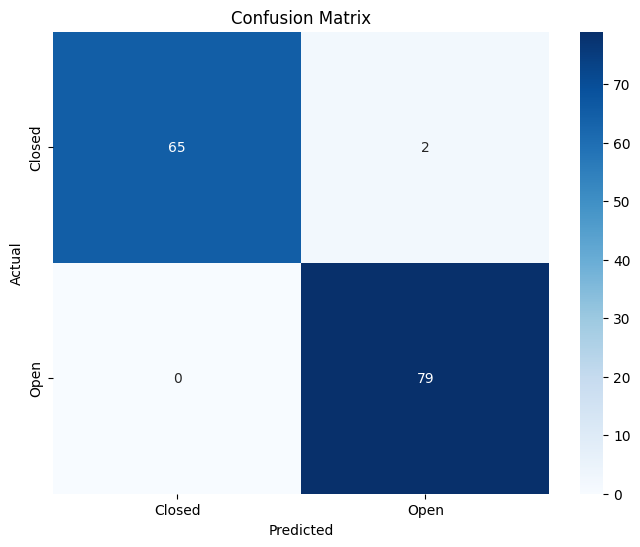

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Xác định categories (các tên lớp)

labels = range(len(CATEGORIES))

# Tính confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes, labels=labels)

# In báo cáo phân loại
print(classification_report(Y_test, Y_pred_classes, target_names=CATEGORIES))

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Prediction 

In [31]:
prediction = model(X_test)

In [32]:
prediction

<tf.Tensor: shape=(146, 2), dtype=float32, numpy=
array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000

In [38]:
import cv2
import numpy as np
from keras.models import load_model

# Load the model
model = load_model(r'D:\Downloads\driver-drowsiness-detection-Project\custmodel.h5')

# Image preprocessing function
def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Convert to grayscale (if required by your model)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize the image to match the input shape of the model (24x24 in your case)
    img = cv2.resize(img, (24, 24))
    
    # Normalize pixel values to [0, 1]
    img = img / 255.0
    
    # Reshape to (24, 24, 1) for a grayscale image
    img = img.reshape(1, 24, 24, 1)
    
    return img

# Path to your image
image_path = r"D:\Downloads\driver-drowsiness-detection-Project\16112790.jpg"

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict using the model
prediction = model.predict(processed_image)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)

print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 2s 2s/step
Predicted class: 1
